Корнилов А.И. 11 Вариант.

Цель лабораторной работы – получение навыков работы с методами регрессии
1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
4.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
5.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;
6.	Заполните пропущенные значения в данных;
7.	Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value.


1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

dateCrawled: при первом сканировании этого объявления все значения полей берутся с этой даты.

name: "имя" автомобиля.

seller: продавец (частный или дилер).

offerType: тип предложения.

price: цена объявления о продаже автомобиля.

abtest

vehicleType: тип кузова.

yearOfRegistration: в каком году автомобиль был впервые зарегистрирован.

gearbox: тип коробки передач.

powerPS: мощность машины в PS.

model: модель автомобиля.

kilometer: сколько километров машина проехала.

monthOfRegistration: в каком месяце автомобиль был впервые зарегистрирован.

fuelType: тип топлива.

brand: марка.

notRepairedDamage: если у автомобиля есть повреждение, которое еще не отремонтировано.

dateCreated: дата, на которую было создано объявление на ebay.

nrOfPictures: количество картинок в объявлении (к сожалению, это поле везде содержит 0 и, следовательно, бесполезно (ошибка в сканере!)).

postalCode: почтовый индекс.

lastSeenOnline: когда сканер увидел это объявление в последний раз.

2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

In [18]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.stats import pearsonr, spearmanr

warnings.filterwarnings("ignore")
%matplotlib inline

figsize=(20,10)

In [4]:
autos_data = pd.read_csv("autos.csv", encoding='iso-8859-1')
autos_data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [5]:
autos_data.nunique()

dateCrawled            280500
name                   233531
seller                      2
offerType                   2
price                    5597
abtest                      2
vehicleType                 8
yearOfRegistration        155
gearbox                     2
powerPS                   794
model                     251
kilometer                  13
monthOfRegistration        13
fuelType                    7
brand                      40
notRepairedDamage           2
dateCreated               114
nrOfPictures                1
postalCode               8150
lastSeen               182806
dtype: int64

In [6]:
autos_data.drop_duplicates(inplace=True)
autos_data.dropna(inplace=True)
autos_data.drop(
    ['dateCrawled', 'offerType', 'dateCreated', 'postalCode', 'lastSeen', 'name', 'model','nrOfPictures'],
    axis = 1,
    inplace=True
)
autos_data.head()

,seller,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
3,privat,1500,test,kleinwagen,2001,manuell,75,150000,6,benzin,volkswagen,nein
4,privat,3600,test,kleinwagen,2008,manuell,69,90000,7,diesel,skoda,nein
5,privat,650,test,limousine,1995,manuell,102,150000,10,benzin,bmw,ja
6,privat,2200,test,cabrio,2004,manuell,109,150000,8,benzin,peugeot,nein
7,privat,0,test,limousine,1980,manuell,50,40000,7,benzin,volkswagen,nein


3.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

In [7]:
numerical_columns = [i for i in autos_data.columns if autos_data[i].dtype.name != 'object']
print("Numerical: " + str(numerical_columns))

Numerical: ['price', 'yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration']


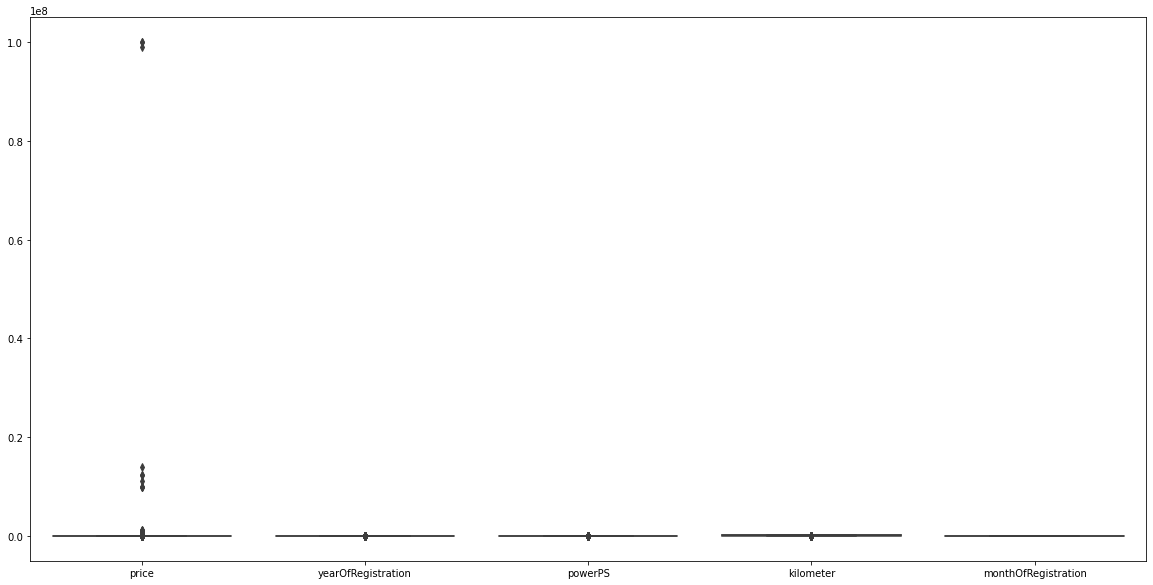

In [8]:
plt.figure(figsize=figsize)
sns.boxplot(data=autos_data[numerical_columns])
plt.show()

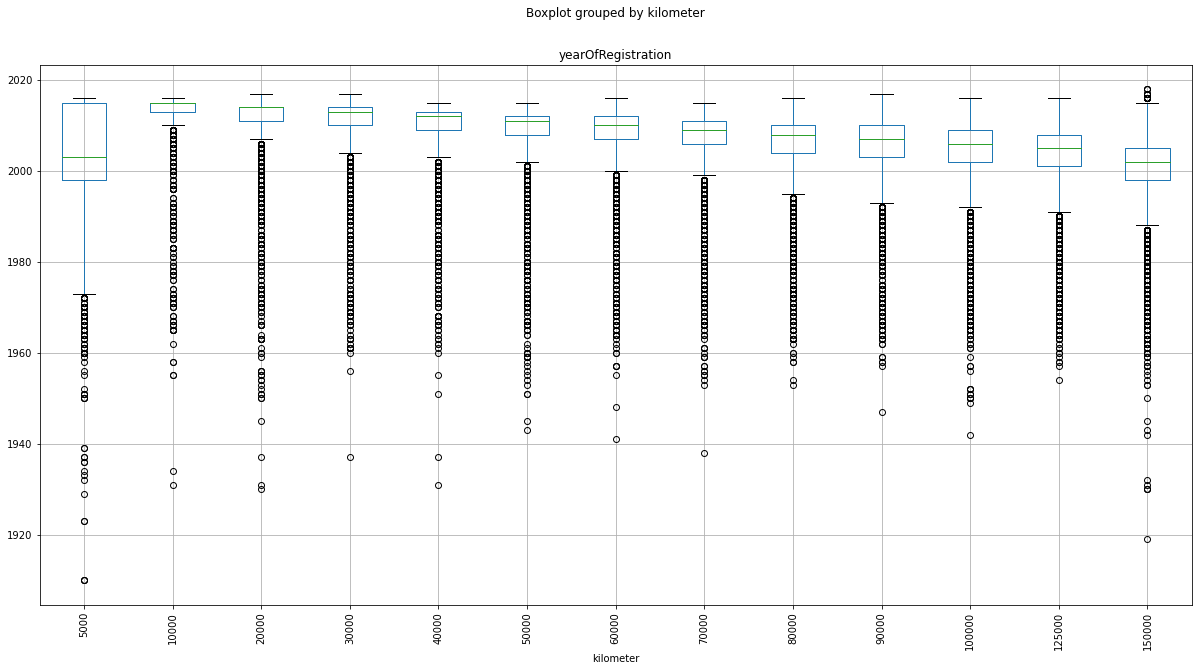

In [9]:
autos_data.boxplot(column='yearOfRegistration', by='kilometer', rot=90, figsize=figsize)
plt.show()

In [10]:
scaler = MinMaxScaler()
autos_data[numerical_columns] = scaler.fit_transform(autos_data[numerical_columns])
autos_data.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
count,260952.000000,260952.000000,260952.000000,260952.000000,260952.000000
mean,0.000082,0.863977,0.006317,0.821096,0.515214
std,0.003433,0.060298,0.007264,0.274813,0.289281
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000015,0.824074,0.003900,0.655172,0.250000
50%,0.000039,0.870370,0.005800,1.000000,0.500000
75%,0.000086,0.907407,0.007500,1.000000,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000


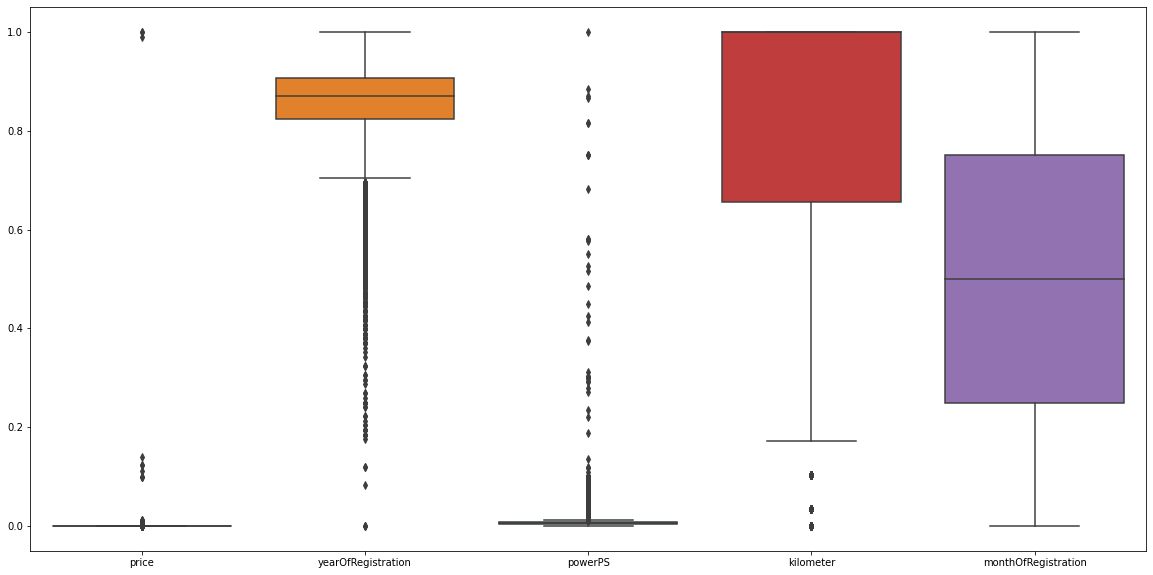

In [11]:
plt.figure(figsize=figsize)
sns.boxplot(data=autos_data[numerical_columns])
plt.show()

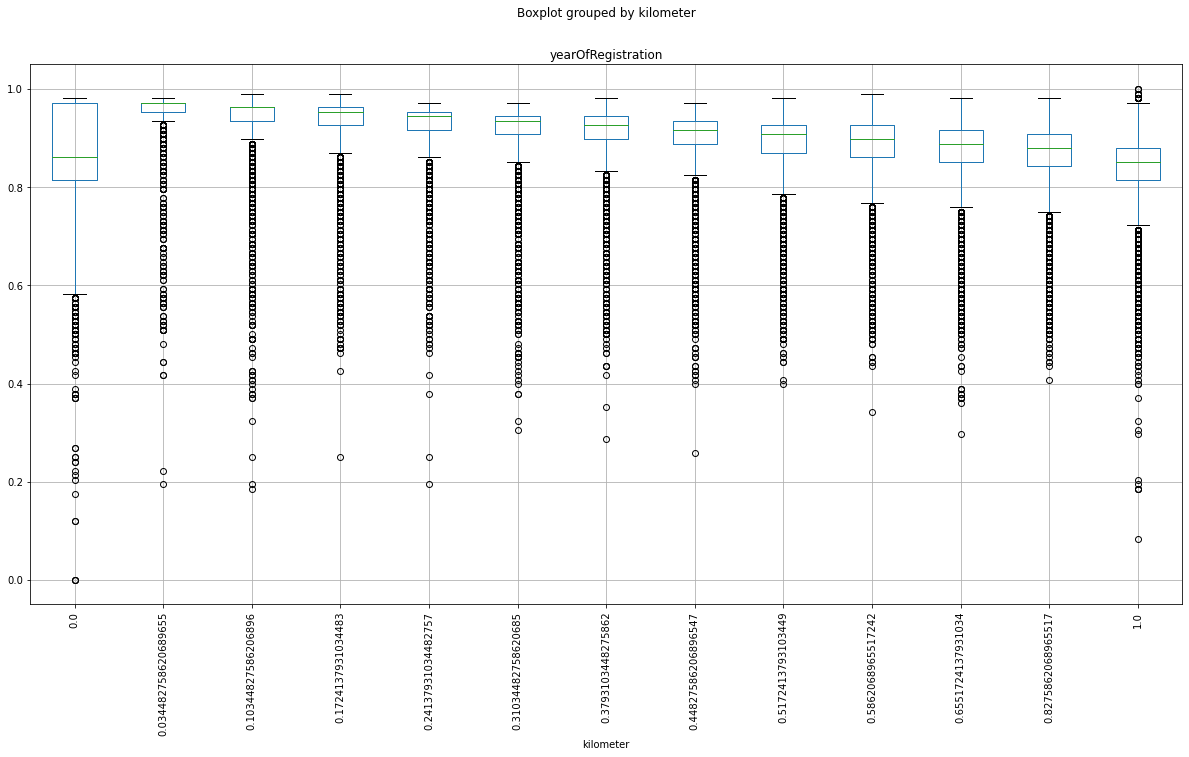

In [12]:
autos_data.boxplot(column='yearOfRegistration', by='kilometer', rot=90, figsize=figsize)
plt.show()

4.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

In [13]:
categorical_columns = [i for i in autos_data.columns if autos_data[i].dtype.name == 'object']
print("Categorical: " + str(categorical_columns))

Categorical: ['seller', 'abtest', 'vehicleType', 'gearbox', 'fuelType', 'brand', 'notRepairedDamage']


In [14]:
nonbinary = [column for column in categorical_columns if len(autos_data[column].unique()) > 2]

for column in [column for column in categorical_columns if len(autos_data[column].unique()) == 2]:
    for i, unic_item in enumerate(autos_data[column].unique()):
        autos_data[column] = autos_data[column].replace(to_replace=[unic_item], value=[i])

data_nonbinary = pd.get_dummies(autos_data[nonbinary])
autos_data.drop(nonbinary, axis=1, inplace=True)
autos_data = pd.concat([data_nonbinary, autos_data] , axis=1)

5.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;

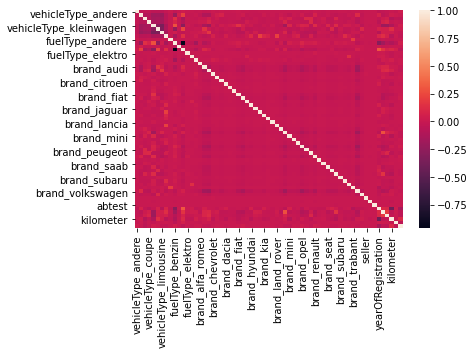

In [15]:
corr_matrix = autos_data.corr()
sns.heatmap(corr_matrix)

6.	Заполните пропущенные значения в данных;

In [16]:
autos_data.isnull().sum()

vehicleType_andere        0
vehicleType_bus           0
vehicleType_cabrio        0
vehicleType_coupe         0
vehicleType_kleinwagen    0
                         ..
gearbox                   0
powerPS                   0
kilometer                 0
monthOfRegistration       0
notRepairedDamage         0
Length: 63, dtype: int64

Пропусков в даных нет.

7.	Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value.

Линейная регрессия, LASSO регуляризатор;

In [44]:
from sklearn.linear_model import Lasso

data_x, data_y = autos_data.drop(['price'], axis=1), autos_data['price']
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size = 0.3, random_state = 123)

lasso = Lasso()
params = {'alpha': np.arange(0, 0.1, 0.01)}
lasso_grid = GridSearchCV(lasso, params)
lasso_grid.fit(train_x, train_y)
best_alpha = lasso_grid.best_estimator_.alpha
print('best alpha:', best_alpha)

best alpha: 0.0


In [45]:
lasso = Lasso(alpha=best_alpha)
lasso.fit(train_x,train_y)
pred_las = lasso.predict(test_x)
P, p_value_P = pearsonr(pred_las, test_y)
print("Pearson correlation: ", P)
S, p_value_S = spearmanr(pred_las, test_y)
print("Spearmen correlation: ", S)
print("P_VALUSE_P :", p_value_P)
print("P_VALUSE_S :", p_value_S)
print(pred_las[:15] - test_y[:15])

Pearson correlation:  0.014858676313668932
Spearmen correlation:  0.6746671509751235
P_VALUSE_P : 3.216555525470809e-05
P_VALUSE_S : 0.0
173420   -0.000008
182741   -0.000100
271616   -0.000042
218173    0.000011
361460   -0.000031
45771    -0.000034
297004    0.000044
58119    -0.000008
304305    0.000054
183986   -0.000010
274833    0.000051
346765   -0.000058
237316   -0.000016
107975   -0.000007
241922   -0.000035
Name: price, dtype: float64


Линейная регрессия без использования регуляризаторов

In [42]:
reg = LinearRegression()
reg.fit(train_x, train_y)
pred_reg = reg.predict(test_x)
print(pred_reg[:15] - test_y[:15])

173420   -0.000007
182741   -0.000100
271616   -0.000042
218173    0.000010
361460   -0.000031
45771    -0.000034
297004    0.000044
58119    -0.000009
304305    0.000055
183986   -0.000010
274833    0.000051
346765   -0.000058
237316   -0.000016
107975   -0.000007
241922   -0.000035
Name: price, dtype: float64


In [43]:
P, p_value_P = pearsonr(pred_reg, test_y)
S, p_value_S = spearmanr(pred_reg, test_y)
print("Pearson correlation: ", P)
print("Spearmen correlation: ", S)
print("P_VALUSE_P :", p_value_P)
print("P_VALUSE_S :", p_value_S)

Pearson correlation:  0.014841693127762318
Spearmen correlation:  0.6742777945627085
P_VALUSE_P : 3.2841162072211554e-05
P_VALUSE_S : 0.0
